# Regresión Logística
Aplicaremos la regresión lógistica expuesta en el módulo de clasificadores a un ejemplo de datos reales!. Estudiaremos un problema de clásificación binaria:

**Minización del riesgo de inversión y maximización de ganancia de un banco Aleman**

### Base de datos
En el siguiente [link](https://onlinecourses.science.psu.edu/stat857/node/215) encontraremos la base de datos. Los datos possen las siguietes variables:

**Credibilidad**: Corresponde a la variable binaria, tiene valor 0 si el crédito fue mal otorgado (es decir hubo problemas con el cliente) y 1 si el crédito fue bien otorgado. Esta es la variable que deseamos predecir usando regresión lógistica si es que no la conocieramos de ante mano. Como se conoce el valor, se puede hacer una estimación del error de predicción!!

**Account Balace**: Estado de cuenta de los clientes

* 1: Si es que no había cuenta al momento de pedir el crédito
* 2: Si la cuenta no tenía dinero al momento de pedir el crédito. 
* 3: Si  $0<$ dinero $\leq 200$ unidades monetarias. 
* 4: Si dinero $> 200$ unidades monetarias.

**Duration of Credit**: Duración en meses de los créditos otorgados!

** Payment Status of Previous Credit** : Estado de cuenta de los clientes

* 0: Si es un cliente vacilante, es decir, tiene un historial de problemas de pago con el banco.
* 1: Si es un cliente problematico en el sentido de que tenía créditos pendientes con otros bancos al momento de pedir crédito.
* 2: Si no tenía créditos anteriores o todos fueron pagados oportunamente.
* 3: Si tenía un credito con el banco al momento de su llegada y no tuvo problemas con este jamás.
* 4: Todos los créditos de ese banco fueron cancelados.

** Purpose **: Proposito del crédito 

* 0: Otro
* 1: Auto nuevo
* 2: Auto usado
* 3: Artículos de inmueble
* 4: Radio/ televisión
* 5: Electrodomésticos
* 6: Reparaciones
* 7: Educación
* 8: Vacaciones
* 9: Entretención
* 10: Negocios

** Credit Amount ** Dinero otorgado en el crédito

** Value Savings/Stock ** Valor de ahorro o acciones

** Length of current employment **: Cuanto llevaba trabajando el cliente al momento de pedir el crédito

* 1: Desempleado
* 2: Menor a un año
* 3: Mayor o igual a un año y menor que cuatro años
* 4: Mayor o igual a cuatro años y menor que 7 años
* 5: Mayor o igual a 7 años

** Instalment per cent ** Cuota en porcentaje de los ingresos disponibles

* 1: Mayor a 35%
* 2: Mayor o igual a 25% y menor que 35%
* 3: Mayor o igual a 20% y menor que 25%
* 4: Menor a 20%

** Sex & Marital Status **: Sexo y estado civil

* 1: Hombre divorciado
* 2: Hombre soltero
* 3: Hombre casado ó viudo
* 4: Mujer

** Duration in Current address **: Tiempo que llevaba viviendo en su dirección al momento de pedir crédito


In [2]:
### Importamos todas las librerías necesarias!!! ###
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [3]:
datos = pd.read_csv('german_credit.csv', header = 0)
print datos.shape
datos

(1000, 21)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


## Análisis exploratorio de los datos

#### Cantidad de créditos bien otorgados y cantidad de créditos mal otorgados

In [4]:
datos['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

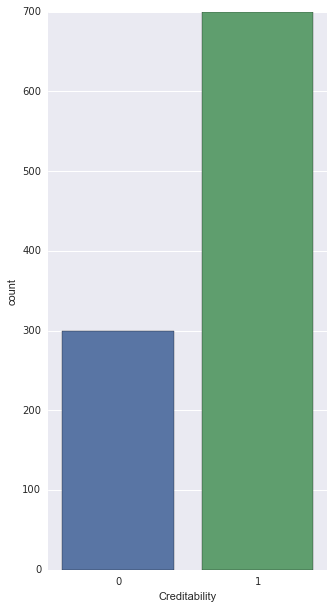

In [23]:
### Podemos gráficar usando seaborn ###
import seaborn as sns
sns.countplot(x = 'Creditability', data = datos)
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (5, 10)
plt.show()

#### A continuación, calcularemos los valores promedios  en las clases de la variable Credibility para las distintas variables categóricas, obviamente solo consideramos las variables númericas!!

In [11]:
datos.groupby('Creditability')['Account Balance','Duration of Credit (month)','Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Creditability,,,,,
0,1.903333,24.860000,3.096667,3938.126667,33.96
1,2.865714,19.207143,2.920000,2985.442857,36.22


#### Observaciones

* Los promedios de la variable **Account Balance** muestran que las personas con mayores recursos tienden a pagar los créditos otorgados, esto tiene sentido, mientras más dinero, más fácil es pagar el crédito!. Sin embargo el promedio para los que no pagaron tampoco es lo suficientemente bajo. 


* Los promedios de la variable **Duration of Credit (month)** muestran que mientras más largo es el crédito otorgado, mayores son los problemas de pago. Tambpien parece un resultado muy razonable


* Los promedios de la variable **Instalment per cent** no otorgan mucha información. Tanto los créditos bien otorgados y mal otorgados presentan promedios similiras en la cuota de pago.


* Los promedios de la variable **Credit Amount** muestran que mientras mayor es el monto del crédito, más problemas hay para el pago


* Los promedios de la variable **Age (years)** son similares.

In [27]:
datos.groupby('Payment Status of Previous Credit')[ 'Creditability','Account Balance','Duration of Credit (month)',
                                                   'Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Creditability,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Payment Status of Previous Credit,,,,,,
0,0.375000,2.075000,27.875000,2.675000,5305.675000,34.300000
1,0.428571,1.979592,22.693878,3.122449,3344.877551,36.061224
2,0.681132,2.473585,20.111321,2.950943,3040.969811,33.915094
3,0.681818,2.761364,26.215909,2.920455,4302.636364,36.102273
4,0.829352,2.877133,19.488055,3.044369,3087.972696,38.399317


In [28]:
datos.groupby('Purpose')[ 'Creditability','Account Balance','Duration of Credit (month)',
                                                   'Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Creditability,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Purpose,,,,,,
0,0.619658,2.418803,18.504274,2.880342,3062.948718,37.089744
1,0.834951,2.815534,26.058252,2.660194,5370.223301,37.252427
2,0.679558,2.314917,19.292818,2.823204,3066.983425,32.403315
3,0.778571,2.800000,20.046429,3.221429,2487.685714,34.767857
4,0.666667,2.333333,16.833333,3.166667,1498.000000,34.250000
5,0.636364,2.500000,19.090909,3.272727,2728.090909,38.545455
6,0.560000,2.620000,21.100000,3.180000,3180.400000,38.940000
8,0.888889,2.666667,11.777778,3.444444,1205.888889,34.666667
9,0.649485,2.659794,26.938144,2.886598,4158.041237,35.350515


In [31]:
datos.groupby('Length of current employment')[ 'Creditability','Account Balance','Duration of Credit (month)',
                                                   'Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Creditability,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Length of current employment,,,,,,
1,0.629032,2.225806,20.661290,2.758065,4216.758065,40.435484
2,0.593023,2.360465,19.401163,2.889535,2952.453488,30.302326
3,0.693215,2.616519,20.365782,2.864307,3125.309735,33.047198
4,0.775862,2.637931,22.994253,2.971264,3601.695402,33.419540
5,0.747036,2.715415,21.264822,3.229249,3224.553360,42.707510


In [32]:
datos.groupby('Sex & Marital Status')[ 'Creditability','Account Balance','Duration of Credit (month)',
                                                   'Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Creditability,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Sex & Marital Status,,,,,,
1,0.600000,2.300000,21.240000,2.500000,3684.700000,38.840000
2,0.648387,2.529032,19.438710,2.829032,2877.783871,32.803226
3,0.733577,2.636861,22.237226,3.093066,3661.879562,37.662409
4,0.728261,2.532609,17.706522,3.000000,2045.543478,30.347826


In [33]:
datos.groupby('Occupation')[ 'Creditability','Account Balance','Duration of Credit (month)',
                                                   'Instalment per cent', 'Credit Amount', 'Age (years)'].mean()

,Creditability,Account Balance,Duration of Credit (month),Instalment per cent,Credit Amount,Age (years)
Occupation,,,,,,
1,0.681818,2.181818,17.363636,2.318182,2745.136364,40.090909
2,0.720000,2.475000,16.535000,2.845000,2358.430000,36.585000
3,0.704762,2.630159,21.411111,3.009524,3070.977778,34.222222
4,0.655405,2.547297,25.168919,3.087838,5435.493243,39.074324


#### Tablas de frecuencias!

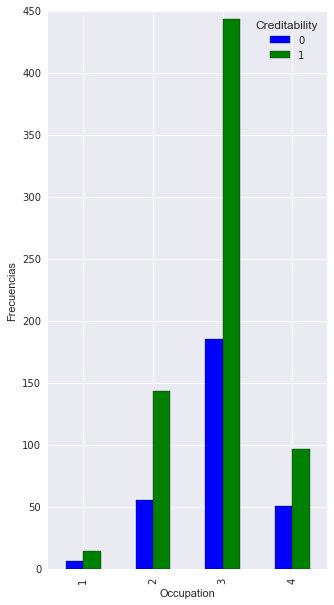

In [40]:
pd.crosstab(datos.Occupation,datos.Creditability).plot(kind='bar', grid= True)
plt.xlabel('Occupation')
plt.ylabel('Frequency')

#### Comentarios

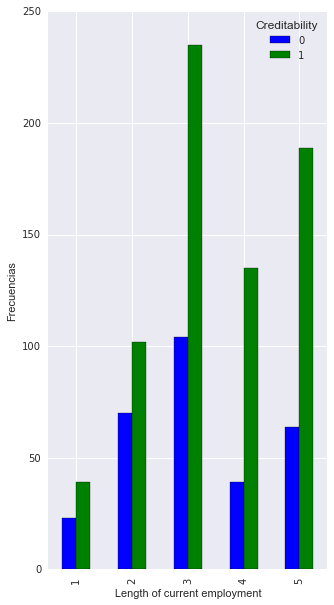

In [80]:
datos1 = datos.rename(index=str, columns={"Length of current employment": "Lengthofcurrentemployment"}) 
pd.crosstab(datos1.Lengthofcurrentemployment,datos1.Creditability).plot(kind='bar', grid= True)
plt.xlabel('Length of current employment')
plt.ylabel('Frequency')
### Obs: El rename lo hicimos por que pd.crosstab no acepta variables que tengan espacios en su escritura!

#### Comentarios

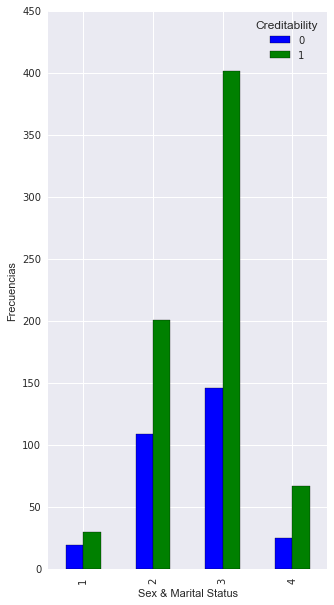

In [79]:
datos2 = datos.rename(index=str, columns={"Sex & Marital Status": "Sex"}) 
pd.crosstab(datos2.Sex,datos2.Creditability).plot(kind='bar', grid= True)
plt.xlabel('Sex & Marital Status')
plt.ylabel('Frequency')
### Obs: El rename lo hicimos por que pd.crosstab no acepta variables que tengan espacios en su escritura!


#### Comentarios:

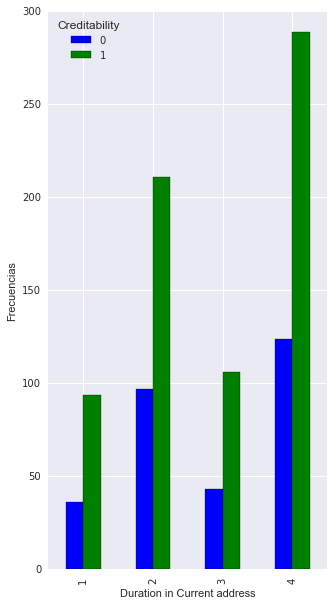

In [82]:
datos3 = datos.rename(index=str, columns={"Duration in Current address": "address"}) 


#### Comentarios

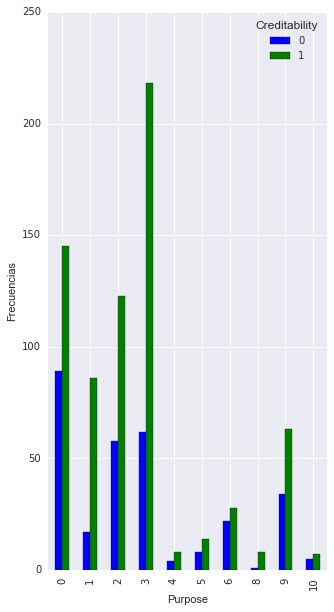

In [83]:
pd.crosstab(datos.Purpose,datos.Creditability).plot(kind='bar', grid= True)
plt.xlabel('Purpose')
plt.ylabel('Frequency')

#### Comentarios

In [ ]:
editando!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!